# Projektabgabe
### Gruppe L: Energieeffizienz in Staubsaugern

**Nils Keller, Max Pazda, Simon Kammerer, Lennart Morlok**

In [266]:
#Module importieren
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
from distutils.spawn import find_executable
from cycler import cycler
from collections.abc import Iterable
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import matplotlib.dates as mdates
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('os', os)
print('locale', locale)
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('find_executable',find_executable)
print('cycler',cycler)

Versionen der verwendeten python-Module: 
os <module 'os' from '/opt/conda/lib/python3.9/os.py'>
locale <module 'locale' from '/opt/conda/lib/python3.9/locale.py'>
numpy 1.22.3
matplotlib 3.5.1
pandas 1.4.2
datetime <module 'datetime' from '/opt/conda/lib/python3.9/datetime.py'>
seaborn 0.11.2
find_executable <function find_executable at 0x7f7a7be8bc10>
cycler <function cycler at 0x7f7a7d3a4a60>


In [267]:
#da das Modul: sklearn einen error bereitet hat habe ich es über pip install heruntergeladen
!pip install -U scikit-learn

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [268]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

In [ ]:
# Zum Bild einfügen
#<img src="https://github.com/morlokle/Abgabe/blob/main/Milestone_F2.jpg?raw=true" width="700"/>

## Verbrauchsanalyse und Erzeugungsanalyse

## Verbrauchsdaten
- Quelle zu den Verbrauchsdaten: Standardlastprofil eines Einfamilienhauses der Stadtwerke Hilden in 2022 https://stadtwerke-hilden.de/netze/netzregulierung/strom/standardlastprofile.html

In [330]:
verbrauch1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Lastprofil_Haushalt.csv'
verbrauch1 = pd.read_csv(verbrauch1,delimiter = ';', decimal=',')

In [331]:
# da Datum als object erkannt wird konvertierung zu datetime
verbrauch1['Datum'] = verbrauch1['Datum'].apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [332]:
#Hier werden die ersten 5 Zeilen der Verbrauchsdaten in einer Tabelle angezeigt
verbrauch1.head() 

,Datum,Leistung [Watt]
0,2022-01-01 00:15:00,104.636
1,2022-01-01 00:30:00,96.775
2,2022-01-01 00:45:00,88.483
3,2022-01-01 01:00:00,82.117
4,2022-01-01 01:15:00,76.464


**Kommentar zu den Verbrauchsdaten:** 
- Die Verbrauchsdaten stellen ein Standartlastprofil (SLP) der Stadtwerke Hilden dar, welche den Stromlastgang eines Einfamilienhauses über das Jahr 2022 simuliert ausgeben. Das SLP hat einen Jahresverbrauch von 1.000.000 kWh im Jahr. Die ersten angezeigten 5 Daten erscheinen uns plausibel und sind erwartungsgemäß, wenn davon ausgegangen wird, dass die Familien die in Einfamilienhäuser in Hilden bewohnen, vermehrt Silvester in dieses Jahr zuhause feiern und somit der Stromverbrauch zu dieser Zeit um 0 Uhr etwas höher ist. 

In [333]:
#Aufbereitung der Standartlast auf ein Einfamilienhaus mit 3-Personen
verbrauch1['Leistung [Watt]'] =verbrauch1['Leistung [Watt]']*1000000**-1*3500

In [334]:
# Da wir viertelstündliche Werte haben wird die Summe durch 4 geteilt um zu prüfen ob Aufbereitung geklappt hat
verbrauch1['Leistung [Watt]'].sum()/4

3500.0000927499996

**Kommentar zur Aufbereitung der Verbrauchsdaten:** 
- Da das SLP einen simulierten Jahresverbrauch von 1.000.000 kWh im Jahr hat werden die Daten für unser Beispiel aufbereitet. Wir gehen in unserem Beispiel von einem 3-Personen-Haushalt aus, welcher einen Stromverbrauch von 3500 kWh im Jahr hat. Auf diesen Verbrauch werden die Werte angeglichen auf diesen Verbrauch.

In [335]:
#Hier werden die maximalen Werte der Verbrauchsdaten angezeigt
verbrauch1.max()

Datum              2023-01-01 00:00:00
Leistung [Watt]               0.797825
dtype: object

**Kommentar Daten des maximalen Werts der Verbrauchsdaten:**
- Bei dieser Anzeige muss beachtet werden das für beide Zeilen der maximale Wert angezeigt wird und diese nicht direkt zusammenhängen. In Fall des Datum wurde der höchste Wert, also angefangen mit dem Jahr 2023 der Wert "2023-01-01" verwedet da er beginnend mit dem Jahr zahlenmäßig der höchste ist. Im Fall des Verbrauches wurde mit 227.95 Watt mit hoher Sicherheit ein Tag aus dem Winer verwendet, an dem der Verbrauch besonders hoch war. (Mehr Strombedarf im Winter z.B. Mehr Licht, Wärmebedarf höher, Personen öfter im Haus wegen Kälte/Sonnenuntergang)

## Erzeugungsdaten
- Quelle zu den Erzeugungsdaten: Michael Brod, Gemessene Daten einer PV-Hausanlage 2011: Messdaten in 15-Minuten-Auflösung. (Die Anlage hat 4,51 kWp, Dachneigung 30 °, Abweichung von Süden 40° nach Westen, Standort 61476 Kronberg im Taunus) https://www.100pro-erneuerbare.com/messdaten/messdaten.htm

In [324]:
erzeugung1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Erzeugungsdaten%20-%20Kopie.csv'
erzeugung1 = pd.read_csv(erzeugung1,delimiter = ';', decimal=',')

In [ ]:
# da Datum als object erkannt wird konvertierung zu datetime
erzeugung1['Datum'] = erzeugung1.Datum.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [327]:
#Hier werden die ersten 5 Zeilen der Erzeugungsdaten in einer Tabelle angezeigt
erzeugung1.head()

,Datum,PV[Watt]
0,2011-01-01 00:00:00,0
1,2011-01-01 00:15:00,0
2,2011-01-01 00:30:00,0
3,2011-01-01 00:45:00,0
4,2011-01-01 01:00:00,0


**Kommentar zu dem Erzeugungsdaten:**
- Die angezeigten 5 Zeilen des Datensatzes zeigen die Erzeugung einer PV-Anlage über ein Jahr in 15 minütiger Auflösung beginnend mit den 01.01.2011 (über das Jahr 2011). Da in der Nacht keine Sonne scheint sind die Werte plausibel und erwartungsgemäß. (Bis auf Feuerwerksraketen sollte keine Einstrahlung auf die Dächer treffen ;) )

In [209]:
#Hier werden die maximalen Werte der Erzeugungsdaten angezeigt
erzeugung1.max()

Datum        2011-12-31 23:45:00
PV[Watt]                    4000
Erzeugung               19764548
dtype: object

**Kommentar Daten des maximalen Werts der Erzeugungsdaten:** 
- Auch bei dieser Anzeige muss beachtet werden das für beide Zeilen der maximale Wert angezeigt wird und diese nicht direkt zusammenhängen. In Fall des Datum wurde der höchste Wert, also der 31.12.2022 um 23:45 Uhr verwedet da er zahlenmäßig der höchste ist. Im Fall der PV Leistung wurde mit 4000 Watt mit hoher Sicherheit ein Tag aus dem Sommer verwendet, welcher von der Auslegung des Wechselrichters auf 4 kW beschränkt ist und deswegen der höchste Wert bei Vollast auch bei 4000 Watt liegt.

### Darstellung des Jahresverlaufs des Verbrauchs und der Erzeugung über der Zeit

<Figure size 720x432 with 0 Axes>

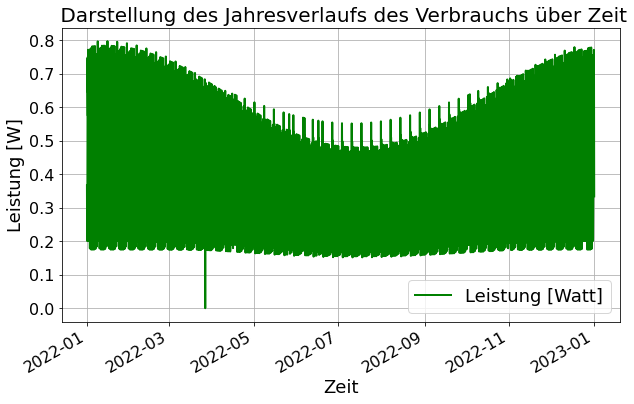

<Figure size 720x432 with 0 Axes>

In [337]:
# Darstellung des Jahresverlaufs des Verbrauchs über der Zeit
verbrauch1.plot(x = 'Datum', y = 'Leistung [Watt]', c="green")
plt.title(' Darstellung des Jahresverlaufs des Verbrauchs über Zeit')
plt.xlabel('Zeit')
plt.ylabel('Leistung [kW]')
plt.grid()
plt.figure()

<Figure size 720x432 with 0 Axes>

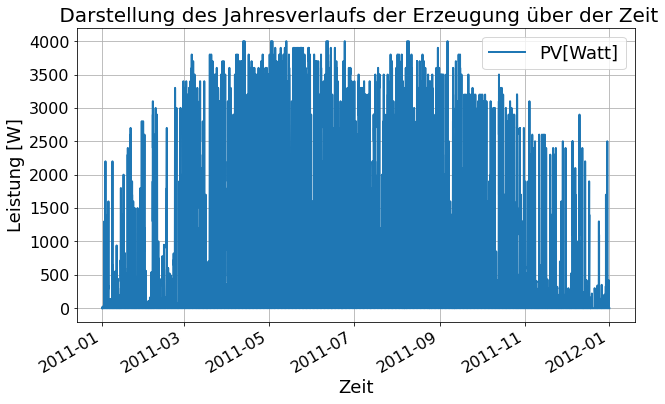

<Figure size 720x432 with 0 Axes>

In [338]:
# Darstellung des Jahresverlaufs der Erzeugung über der Zeit
erzeugung1.plot(x = 'Datum', y = 'PV[Watt]')
plt.title(' Darstellung des Jahresverlaufs der Erzeugung über der Zeit')
plt.xlabel('Zeit')
plt.ylabel('Leistung [W]')
plt.grid()
plt.figure()

### Darstellung der Dauerlinien

In [357]:
#res = erzeugung1['Datum'][1]-erzeugung1['Datum'][0]
#print('Auflösung '+str(res))

In [358]:
#dW = 1000*60*60 # kWh in J
#dt = 15*60 # 15 min. in sec
#dW_dt_faktor = dW/dt
#print('Umrechnungsfaktor zu W ist ' + str(dW_dt_faktor))

In [359]:
#erzeugung1['industrialP'] = dW_dt_faktor*0.001*erzeugung1['PV[Watt]']

In [360]:
#erzeugung1.head()

In [361]:
#df2 = erzeugung1.dropna(subset=['zeit','industrialP'])

### Verbrauch

In [368]:
sorted_1 = sorted(verbrauch1['Leistung [Watt]'], reverse = True)

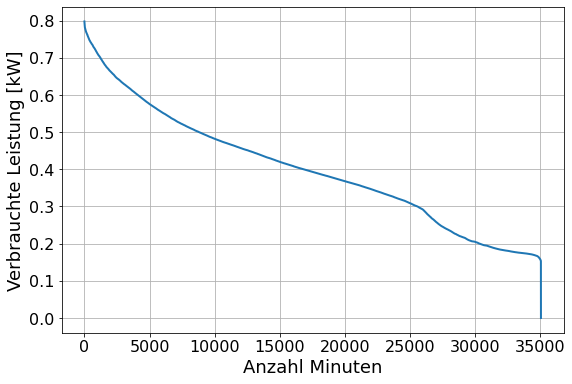

In [370]:
plt.figure(figsize=(9,6))
plt.plot(verbrauch1.index-verbrauch1.index[0],sorted_1)
plt.ylabel('Verbrauchte Leistung [kW]')
plt.xlabel('Anzahl Minuten')
plt.grid()
plt.show()

### Erzeugung

In [364]:
sorted_2 = sorted(erzeugung1['PV[Watt]'], reverse = True)

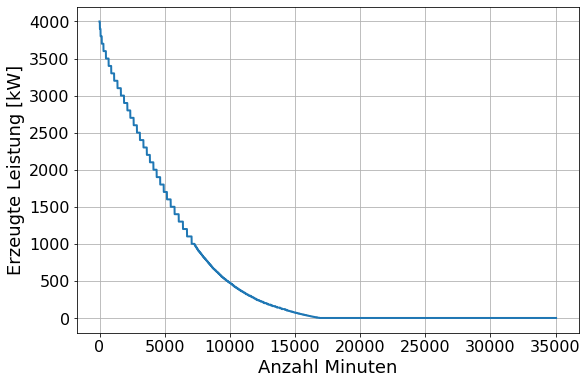

In [365]:
plt.figure(figsize=(9,6))
plt.plot(erzeugung1.index-erzeugung1.index[0],sorted_2)
plt.ylabel('Erzeugte Leistung [kW]')
plt.xlabel('Anzahl Minuten')
plt.grid()
plt.show()

### Darstellung des Taganteils gegenüber dem Nachtanteil

### Darstellung des Sommeranteils gegenüber dem Winteranteil

In [230]:
# Sommer: In 2011 Kalendarisch von Dienstag, 21. Juni bis Freitag, 23. September
# Winter: Annahme In 2011 Kalendarisch von Samstag 01. Januar bis 21. März 2011 (theoretisch + 22.12.10-31.12.10)

### Verbrauch

In [ ]:
verbrauch1.set_index('Datum', inplace = True)

In [ ]:
ax = verbrauch1.loc['2011-06-21':'2011-09-23'].plot(y =  ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

### Erzeugung:

In [232]:
erzeugung1.set_index('Datum', inplace = True)

In [233]:
ax = erzeugung1.loc['2011-06-21':'2011-09-23'].plot(y =  ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

SyntaxError: invalid syntax (1024386022.py, line 1)

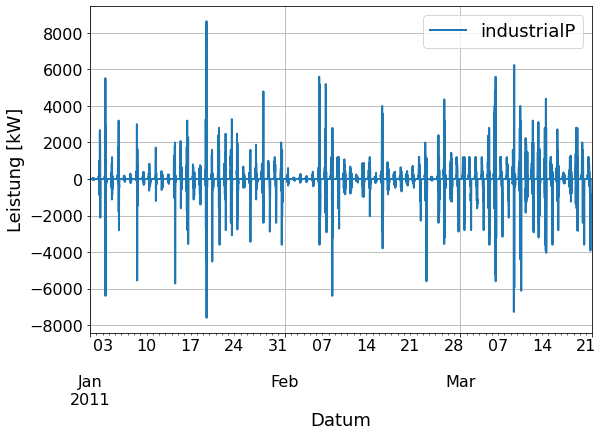

In [237]:
ax = erzeugung1.loc['2011-01-01':'2011-03-21'].plot(y = 'industrialP',linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

### Übersicht über monatsspezifische Schwankungsbreiten (Boxplot)

In [ ]:
df2.set_index('Datum', inplace = True)

In [ ]:
ax = df2.loc['2011-01'].plot(y = 'industrialP',linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(df2.loc['2011-01', 'industrialP'], linestyle='-')
ax.set_ylabel('Leistung [kW]')
ax.set_title('Stromerzugung Januar 2011')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%b'))
plt.grid()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

for name, ax in zip(['industrialP', 'pvP'], axes):
    ax.grid()
    sns.boxplot(data=df2, x='Monat', y=name, ax=ax)
if ax != axes[-1]:
    ax.set_xlabel('')

### Heatmap

In [347]:
#Die folgende Funktion ermöglicht es, die Achsenskalierung besser anzupassen.
class AxTransformer:
    def __init__(self, datetime_vals=False):
        self.datetime_vals = datetime_vals
        self.lr = linear_model.LinearRegression()
        
        return
    
    def process_tick_vals(self, tick_vals):
        if not isinstance(tick_vals, Iterable) or isinstance(tick_vals, str):
            tick_vals = [tick_vals]
            
        if self.datetime_vals == True:
            tick_vals = pd.to_datetime(tick_vals).astype(int).values
            
        tick_vals = np.array(tick_vals)
            
        return tick_vals
    
    def fit(self, ax, axis='x'):
        axis = getattr(ax, f'get_{axis}axis')()
        
        tick_locs = axis.get_ticklocs()
        tick_vals = self.process_tick_vals([label._text for label in axis.get_ticklabels()])
        
        self.lr.fit(tick_vals.reshape(-1, 1), tick_locs)
        
        return
    
    def transform(self, tick_vals):        
        tick_vals = self.process_tick_vals(tick_vals)
        tick_locs = self.lr.predict(np.array(tick_vals).reshape(-1, 1))
        
        return tick_locs
    
def set_date_ticks(ax, start_date, end_date, axis='y', date_format='%Y-%m-%d', **date_range_kwargs):
    dt_rng = pd.date_range(start_date, end_date, **date_range_kwargs)

    ax_transformer = AxTransformer(datetime_vals=True)
    ax_transformer.fit(ax, axis=axis)
    
    getattr(ax, f'set_{axis}ticks')(ax_transformer.transform(dt_rng))
    getattr(ax, f'set_{axis}ticklabels')(dt_rng.strftime(date_format))

    ax.tick_params(axis=axis, which='both', bottom=True, top=False, labelbottom=True)
    
    return ax

In [ ]:
x = 'Datum', y = 'Leistung [Watt]'
x = 'Datum', y = 'PV[Watt]'

In [351]:
import matplotlib.dates as mdates

In [353]:
hm_df = pd.DataFrame({'Leistung [Watt]': verbrauch1['Leistung [Watt]']})
hm_df['date'] = verbrauch1.index.date
hm_df['time'] = verbrauch1.index.time
hm_piv = hm_df.pivot(index = 'time', columns = 'date', values = 'Leistung [Watt]')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_piv, cbar_kws={'label': 'Leistung [kW]'})
ax.set_title('Leistung [kW] des Stromnetzimports\n eines Industriebetriebs')
set_date_ticks(ax, hm_piv.columns[0], hm_piv.columns[-1] ,axis='x', freq='1M', date_format='%B %Y')
ax.tick_params(axis="x", rotation=45)

AttributeError: 'RangeIndex' object has no attribute 'date'

In [354]:
hm_df = pd.DataFrame({'PV[Watt]': df2['PV[Watt]']})
hm_df['date'] = df2.index.date
hm_df['time'] = df2.index.time
hm_piv = hm_df.pivot(index = 'time', columns = 'date', values = 'industrialP')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_piv, cbar_kws={'label': 'Leistung [kW]'})
ax.set_title('Leistung [kW] einer PV-Anlage \n auf einem Einfamilienhaus in 2011')
set_date_ticks(ax, hm_piv.columns[0], hm_piv.columns[-1] ,axis='x', freq='1M', date_format='%B %Y')
ax.tick_params(axis="x", rotation=30)

AttributeError: 'Int64Index' object has no attribute 'date'

In [ ]:
#da sklearn einen error bereitet hat habe ich es über pip install heruntergeladen
import sklearn
!pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
from distutils.spawn import find_executable
from cycler import cycler
from collections.abc import Iterable
# from sklearn import linear_model
#from jupytercards import display_flashcards
#from pygit2 import Repository
#from jupyterquiz import display_quiz

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('find_executable',find_executable)
print('cycler',cycler)

# Klimawirkung und Ressourceneffizienz 

# Messungen durchführen und zu Jahreslastprofilen ergänzen

Art: Kabelstaubsauger Siemens <br> Typ: VS06A111 <br> Name des Geräts: synchropower <br> Inhalt des Typenschilds oder des Datenblatts: Spannung = 220-240V, Frequenz = 50/60Hz, Leistung = 600W

In [302]:
# Hier wird die erste Messung gezeigt (Messung über ca. 25 min, Saugfläche:  
# Der Prüfling sollte sich gezielt keine Gedanken machen über die Effizienz des Systems beim Saugvorgang!
messung1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Daten_Siemens_Dauerlinie.csv'
messung1 = pd.read_csv(messung1,delimiter = ',', decimal= '.')

In [305]:
# da Datum als object erkannt wird Konvertierung zu datetime
messung1['Aufnahmezeit'] = messung1.Aufnahmezeit.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [315]:
print(messung1)

          Aufnahmezeit  Stromstärke (A)  Wirkleistung (W)  Scheinleistung (W)
0  2022-10-27 14:04:00            0.000          0.000000              0.0000
1  2022-10-27 14:05:00            0.983         61.707825            228.5475
2  2022-10-27 14:06:00            2.911        654.526706            674.7698
3  2022-10-27 14:07:00            2.884        648.735612            668.7996
4  2022-10-27 14:08:00            2.867        645.189680            665.1440
5  2022-10-27 14:09:00            2.855        643.043070            662.9310
6  2022-10-27 14:10:00            2.841        639.889794            659.6802
7  2022-10-27 14:11:00            2.623        529.198119            608.2737
8  2022-10-27 14:12:00            2.843        639.237178            659.0074
9  2022-10-27 14:13:00            2.830        636.314180            655.9940
10 2022-10-27 14:14:00            2.808        631.639944            651.1752
11 2022-10-27 14:15:00            2.838        638.388234       

**Beobachtungen und Auffälligkeiten:** <br> 
- Da der Energielogger nur minütliche Werte ausgibt, muss ein besonderes Augenmerk auf die erste und die letzte Minute der Messung gelegt werden und diese ggf. vernachlässigt werden. Außerdem ist aufallend, dass die Leistung des Staubsaugers mehr oder weniger in den Minuten 2-19 konstant zwischen 655-630 W schwankt und darin nur ein einzelner Ausreiser mit ca. 523 W liegt. Eine Abweichung ist jedoch zwischen der 19-23 Minute zu erkennen in welchen der Messende den Teppich und das Sofa in dem Raum gemessen hat und deswegen die Stufe am Staubsauger wechseln musste.

In [311]:
# Hier wird die zweite Messung gezeigt (Messung über ca. 20 min, Saugfläche:  
# Prüfling hat hier gezielt durchgehend auf der zweiten Stufe des Staubsaugers gesaugt!
messung2 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/18.11.22_20MinutenStufe2%20(1).csv'
messung2 = pd.read_csv(messung2,delimiter = ';', decimal= ',')

In [312]:
# da Datum als object erkannt wird Konvertierung zu datetime
messung2['Aufnahmezeit'] = messung2.Aufnahmezeit.apply(#
    lambda x: #
    dt.datetime.strptime(x,"%m.%d.%Y %H:%M"))

In [314]:
print(messung2)

          Aufnahmezeit  Stromstärke (A)  Wirkleistung (W)  Scheinleistung (W)
0  2022-11-18 18:20:00            0.880         32.848640            205.3040
1  2022-11-18 18:21:00            2.661        427.441752            619.4808
2  2022-11-18 18:22:00            2.599        417.123906            604.5274
3  2022-11-18 18:23:00            2.573        413.306136            598.9944
4  2022-11-18 18:24:00            2.567        412.342344            597.5976
5  2022-11-18 18:25:00            2.557        411.088890            595.7810
6  2022-11-18 18:26:00            2.556        410.928120            595.5480
7  2022-11-18 18:27:00            2.529        406.412829            589.0041
8  2022-11-18 18:28:00            2.549        410.154492            594.4268
9  2022-11-18 18:29:00            2.562        412.423074            597.7146
10 2022-11-18 18:30:00            2.558        411.426162            596.2698
11 2022-11-18 18:31:00            2.564        411.506616       

**Beobachtungen und Auffälligkeiten:** <br>
- Auch hier gibt des Energielogger wieder nur minütliche Werte aus. Deswegen kann die die erste und die letzte Minute der Messung vernachlässigt werden. Das Gesamtssystem schwankt zwischen einem Maximum von 427 W und einem Minimum von 402 Watt. Es ist aufällig, dass das Maximum mit der ersten Messung erreicht wird und anschließend das Leistungsniveau abnimmt. Evtl. muss der Staubsauger erst auf eine gewisse Betriebstemperatur kommen und benötigt so mehr Leistung zu Beginn der Messung.

In [ ]:
#Zeit für Jahreslastprofil Messung 1
Tage1 = 2 # Tage an denen gesaugt wird
Wochen1 = 52 # Anzahl an Wochen im Jahr
Jahresfaktor1 = Tage1*Wochen1
print("Jahresfaktor: ",Jahresfaktor1)


In [ ]:
messung1['Jahresprofil1'] = 

In [ ]:
#Zeit für Jahreslastprofil Messung 2
Tage1 = 1 # Tage an denen gesaugt wird
Wochen1 = 52 # Anzahl an Wochen im Jahr
Jahresfaktor2 = Tage1*Wochen1
print("Jahresfaktor: ",Jahresfaktor2)

Sum2 = messung2.loc['2022-11-18 18:21:00 :2022-11-18 18:40:00 ', 'Active Power [W]']
print(Sum2)

# Maßnahmen zur Verbesserung der Klimawirkungen und des Energieverbrauchs evaluieren

**Einsparmaßnamen im Überblick**
1. Dauerhaftes Staubsaugen auf Stufe 2 (2x pro Woche für 20 Minuten)
2. Nutzung des erneuerbaren PV-Stroms der eigenen PV-Anlage; Staubsaugen zu bestimmter Uhrzeit (1x pro Woche um 12 Uhr)
3. Einbau einer Anzeige über Füllstand des Staubsaugerbeutels: Geregelter Austausch bei Füllstand von 80% 
4. Austausch des Messgerätes durch einen neuen, effizienteren Staubsauger

## Maßnahme 1: Staubsaugen auf Stufe 2 

## Maßnahme 2: Staubsaugen zu bestimmter Uhrzeit (12 Uhr Mittags)

## Maßnahme 3: Einbau einer Anzeige über Füllstand des Staubsaugerbeutels

## Maßnahme 4: Austausch des Messgerätes durch einen neuen, effizienteren Staubsauger

### Wirtschaftlichkeit der Einsparmethode bewerten

- Die gewählte Einsparmethode ist den Fokus auf den vermehrten Austausch des Staubsaugerbeutels zu legen, sodass der Staubsauger so weniger Luft-Widerstände hat und somit weniger Leistung für die identische Saugleistung benötigt.

- Dafür soll in den Staubsauger ein analoger Controller eingebaut werden, welcher mit einer Anzeige ausgestattet ist und darstellt, wie voll der Staubsaugerbeutel ist. 
- Die Anzeige soll erst von grün auf rot wechseln, wenn 80% des Staubbeutels voll sind. 
Anschließend soll der Beutel getauscht werden.

- Es wird angenommen, dass durch diese Einsparung 20% weniger Leistung und somit weniger Energie zum saugen benötigt wird. 
> Zur Vereinfachung sind in dieser Rechnung 20% weniger Leistung = 20% weniger Stromkosten die benötigt weden)

- Zum Vergleich wird einmal mit Cotroller zur Filterwechselanzeige gerechnet und einmal ohne, um die Investition bewerten zu können

#### Kapitalgebundene Kosten
- **kapitalgebundene Kosten**: Analoger Controller für 40 Euro
> Zum Glück kennt sich der Cousin von Simon Kammerer mit Staubsaugercontrollern aus und erklärt sich bereit seinen Sonntag für den Umbau zu opfern. Ihm machen Bastelarbeiten Spaß und deswegen entfallen Personalkosten die für den komplizierten Umbau von 3 Stunden nötig wären.

In [ ]:
invest = -40 # Euro

Benötigte Stromkosten 0,45ct/kWh mit Stromeinsatz aus Messung2 pro Saugvorgang (Staubsaugen über 20min auf Stufe2) <br> <br> 0,45ct/kWh * 0,2598 kWh (benötigte Energie pro Saugvorgang)
- wir rechnen somit mit zwei Varianten: V1: 0,1168920 €/Saugvorgang (ohne Anzeige) V2: 0,09351366 €/Saugvorgang (mit Anzeige)

**Nutzungsdauer des Controllers = Nutzungsdauer des Staubsauger**

In [ ]:
TN = 5 # Jahre 

- **bedarfsgebundene Kosten - hier Erlöse**: 
- aus Lastprofilen ergibt sich eine potenzielle Einsparung von 52 kWh im Jahr, Strompreis 45 ct/kWh, Saughäufigkeit = 52*2 # 2x pro Woche

In [374]:
energysavings = 52 # kWh
electricityprice = 0.45 # Euro
usage_cost = energysavings*electricityprice
print('bedarfsgebundene Erlöse im ersten Jahr: '+str(usage_cost)+' EUR/a')

bedarfsgebundene Erlöse im ersten Jahr: 23.400000000000002 EUR/a


- **betriebsgebundene Kosten**: 
  - Anzeigen-Wartung - entfällt, sehr robustes Einbauteil welches nicht überarbeitet werden muss
  - Betrieb - entfällt, da die Anzeige analog ist
  - Sicherheit - keine relevantes Sicherheitsrisiko durch Anzeige

In [377]:
maintenance_cost = 0
print('betriebsgebundene Kosten :'+str(maintenance_cost)+' EUR')

betriebsgebundene Kosten :0 EUR


- sonstige Kosten: Versicherung und allgemeine Verwaltungskosten entfallen

In [378]:
other_cost = 0
print('sonstige Kosten :'+str(other_cost)+' EUR')

sonstige Kosten :0 EUR


Betrachtungszeitraum  𝑇  2022/2023:

15 Jahre

In [383]:
T = 15 # a

In [384]:
p = 0.05 # Zinsfuß von 5 %
q = 1+p
print('Zinsfaktor im Projekt: '+str(q))

Zinsfaktor im Projekt: 1.05


In [385]:
r = 1 # Analoge Staubsaugeranzeigen bleiben im Preis konstant
print('Preisänderungsfaktor Anzeige: '+str(r))

Preisänderungsfaktor Anzeige: 1


In [387]:
a = (q**T)*(q-1)/((q**T)-1)
print('Der Annuitätsfaktor beträgt '+str(a))

Der Annuitätsfaktor beträgt 0.0963422876092444


Fazit: Durch die Wirtschaftlichkeitsberechnung. 
    
Ob Energie effizienter eingesetzt wird, kann erst durch den genauen Materialverbrauch und Energieeinsatz ermittelt werden, 
der für die Herstellung eines Staubsaugerbeutels "Typ Siemens synchropower" nötig ist. Da durch den vermehrten Austausch der 
Staubbeutel, wird zwar mit weniger Staub störungsfreier gesaugt und somit weniger Leistung für den Saugvorgang benötigt, 
jedoch kann es dazu kommen das mehr von diesen Beuteln verbraucht werden und die Herstellung dieser besonders Energieaufwänig ist 
und somit doch nicht weniger Energie eingesetzt wurde. (vgl. reverse Effekt)

Da die Datenlage für den Energie- und Materialeinsatz eines Staubbeutels in der Produktion eher undurchsichtig ist, 
muss bei weiterer Behandlung dieser Thematik...... Für den Rahmen einer Wirtschaftlichkeitsbetrachtung der Effizienzmaßnahme einer Anzeige für den Füllstand des Staubbeutels ist jedoch zu......